# 상관분석

# 1. 선형 상관 예제: `MLB Baseball dataset`
* note: 위 데이터셋은 Journal of Statsitsics Education(JSE)에서 가져왔으며, Mitchell R. Watnik로부터 사용 허가를 받았습니다.

## 0. 라이브러리 및 데이터 로딩

In [2]:
# 필요 라이브러리 로딩
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt # 시각화 툴
import seaborn as sns # 시각화 툴

from scipy import stats # 피어슨, 스피어맨 상관계수

In [11]:
# MLB 데이터셋 로딩
df = pd.read_csv('./data/baseball_hitting.csv')
df

,Player name,position,Games,At-bat,Runs,Hits,Double (2B),third baseman,home run,run batted in,a walk,Strikeouts,stolen base,Caught stealing,AVG,On-base Percentage,Slugging Percentage,On-base Plus Slugging
0,B Bonds,LF,2986.0,9847.0,2227.0,2935.0,601.0,77.0,762.0,1996.0,2558.0,1539,514.0,141,0.298,0.444,0.607,1.051
1,H Aaron,RF,3298.0,12364.0,2174.0,3771.0,624.0,98.0,755.0,2297.0,1402.0,1383,240.0,73,0.305,0.374,0.555,0.929
2,B Ruth,RF,2504.0,8399.0,2174.0,2873.0,506.0,136.0,714.0,2213.0,2062.0,1330,123.0,117,0.342,0.474,0.690,1.164
3,A Pujols,1B,3080.0,11421.0,1914.0,3384.0,686.0,16.0,703.0,2218.0,1373.0,1404,117.0,43,0.296,0.374,0.544,0.918
4,A Rodriguez,SS,2784.0,10566.0,2021.0,3115.0,548.0,31.0,696.0,2086.0,1338.0,2287,329.0,76,0.295,0.380,0.550,0.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503,R Derry,LF,187.0,553.0,68.0,124.0,17.0,7.0,17.0,73.0,78.0,124,2.0,0,0.224,0.322,0.373,0.695
2504,M Kittridge,C,470.0,4027.0,375.0,882.0,108.0,31.0,17.0,390.0,314.0,166,64.0,--,0.219,0.277,0.274,0.551
2505,G DeMontreville,2B,280.0,3615.0,537.0,1096.0,130.0,35.0,17.0,497.0,174.0,35,228.0,--,0.303,0.340,0.373,0.713
2506,L Niekro,1B,195.0,499.0,61.0,123.0,26.0,5.0,17.0,79.0,29.0,91,0.0,2,0.246,0.288,0.421,0.709


| **칼럼명**                   | **설명**                                                                                                             |
|------------------------------|----------------------------------------------------------------------------------------------------------------------|
| `Player name`                | 선수의 이름을 나타냅니다.                                                                                             |
| `Position`                   | 선수의 필드 위치를 나타냅니다. (예: 외야수, 포수 등)                                                                 |
| `Games`                      | 선수의 출전 경기 수를 나타냅니다.                                                                                     |
| `At-bat`                     | 선수가 타석에 들어선 횟수를 나타냅니다.                                                                               |
| `Runs`                       | 선수가 기록한 득점 수를 나타냅니다.                                                                                   |
| `Hit`                        | 선수가 기록한 안타 수를 나타냅니다.                                                                                   |
| `Double (2B)`                | 선수가 기록한 2루타 수를 나타냅니다.                                                                                  |
| `Third baseman (3B)`         | 선수가 기록한 3루타 수를 나타냅니다.                                                                                  |
| `Home run`                   | 선수가 기록한 홈런 수를 나타냅니다.                                                                                   |
| `Run batted in (RBI)`        | 선수가 기록한 타점 수를 나타냅니다.                                                                                   |
| `A walk`                     | 선수가 받은 볼넷 수를 나타냅니다.                                                                                     |
| `Strikeouts`                 | 선수가 당한 삼진 수를 나타냅니다.                                                                                     |
| `Stolen base`                | 선수가 기록한 도루 수를 나타냅니다.                                                                                   |
| `Caught stealing`            | 선수가 도루 시도 중 잡힌 횟수를 나타냅니다.                                                                           |
| `AVG`                        | 선수의 타율을 나타냅니다. 타율은 안타 수를 타석 수로 나눈 비율로 계산됩니다.                                           |
| `On-base percentage (OBP)`   | 선수의 출루율을 나타냅니다. 출루율은 안타, 볼넷, 몸에 맞는 공의 합을 타석, 볼넷, 몸에 맞는 공, 희생 플라이의 합으로 나눈 비율입니다. |
| `Slugging percentage (SLG)`  | 선수의 장타율을 나타냅니다. 장타율은 총 베이스 수를 타석 수로 나눈 값입니다.                                         |
| `On-base plus slugging (OPS)`| 선수의 출루율과 장타율의 합을 나타냅니다. 전체적인 공격 성과를 평가하는 지표입니다.                                  |
 또는 1(맞음)으로 구성됨. |


## 1-1. 산점도를 이용한 출루율(OBP)와 타율(Bat_avg) 관계 확인

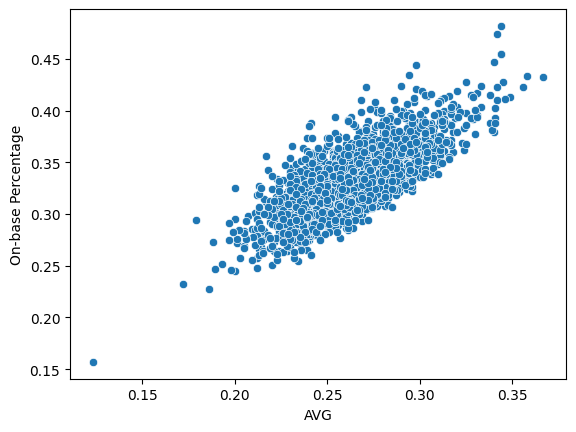

In [12]:
# 출루율을 나타내는 OBP와
# 타율을 나타내는 Bat_avg의 관계 확인

sns.scatterplot(x=df['AVG'], y=df['On-base Percentage'])
plt.show()

- 강한 선형 관계가 있는 것으로 보인다.
- 하지만 이상치가 눈에 띄는 것이 특징 << 이것이 데이터를 시각화했을 때 얻는 장점 중 하나임!
- 끝단에 있는 이상치가 영향을 줄 것으로 보인다. 왼쪽 하단 쪽은 너무 동떨어져 있는 비현실적인 수치를 보여줌

## 1-2. 정규성 확인
- Shapiro-Wilk 검정을 통해 정규성을 확인합니다.
- 귀무 가설과 대립 가설은 아래와 같습니다.
- Ho : 데이터가 정규 분포를 따름
- H1 : 데이터가 정규 분포를 따르지 않음

In [15]:
# 또는 NaN 값을 중앙값으로 대체
# NaN 값을 중앙값으로 대체 (inplace=True 없이)
df['AVG'] = df['AVG'].fillna(df['AVG'].median())
df['On-base Percentage'] = df['On-base Percentage'].fillna(df['On-base Percentage'].median())

In [16]:
# 피어슨 상관계수 확인 전 정규성을 충족하는지 확인

print('타율의 정규성 shapiro test : ', stats.shapiro(df['AVG']))
print('출루율의 정규성 shapiro test : ', stats.shapiro(df['On-base Percentage']))

타율의 정규성 shapiro test :  ShapiroResult(statistic=0.9924032952138564, pvalue=3.5294623998068043e-10)
출루율의 정규성 shapiro test :  ShapiroResult(statistic=0.9884004647013194, pvalue=2.080735731110244e-13)


주어진 결과에서:

- 타율의 정규성 Shapiro-Wilk 검정:

통계량(statistic): 0.9924
p-value: 
3.53
×
1
0
−
10
3.53×10 
−10
  (0.000000000353)
- 출루율의 정규성 Shapiro-Wilk 검정:

통계량(statistic): 0.9884
p-value: 
2.08
×
1
0
−
13
2.08×10 
−13
  (0.000000000000208)
- 이러한 p-value는 0에 근사하며 모두 매우 작아서, 데이터가 정규 분포를 따르지 않는다는 결론을 내릴 수 있음
- 즉, 귀무가설 기각. 두 변수 모두 정규성을 충족하지 않음

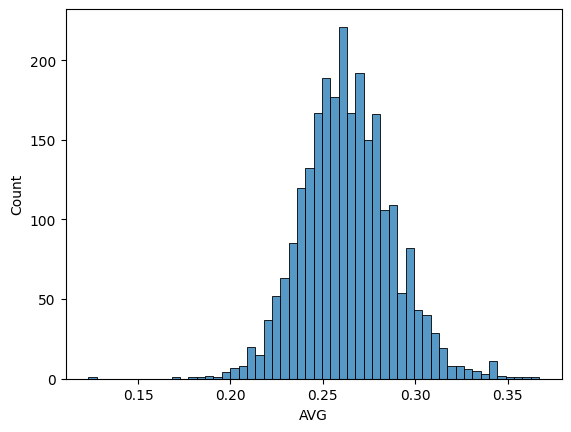

In [17]:
# 왜 정규성을 충족하지 않는지 히스토그램으로 확인해보기
sns.histplot(df['AVG'])
plt.show()

- 어떻게 보면 종모양을 닮았다고 볼 수도 있는데,
- 아마도 양 끝의 극단치들이 영향을 준 것으로 짐작된다. 

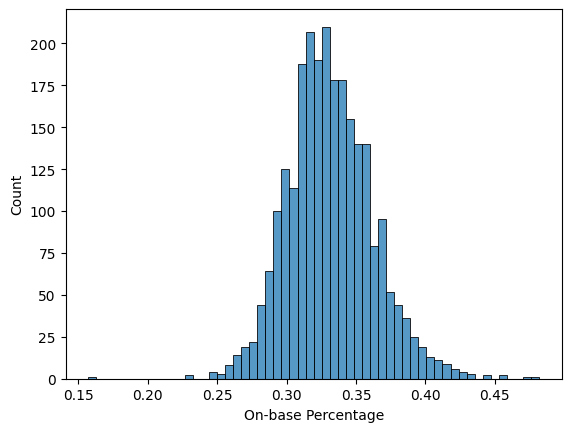

In [18]:
sns.histplot(df['On-base Percentage'])
plt.show()

- 여기도 극단치의 영향을 받은 것으로 확인된다.

> 그렇다면? 
- 어떻게 이상치를 판단할 것인가?
- 가장 쉬운 것은 규정 타석을 채웠는가이다.
- 1타석 했는데 안타 하나도 못쳤다. 그런데 출루율에 포함되어있다면 샘플이 너무 적기 때문에 판단할 수 있는 부분이 적다.

- 하지만 칼럼들 중 정규 타석에 대한 데이터는 없다.
- 그렇기에 타석을 대체하는 변수로 개인 시즌 안타 기록을 사용한다. (50개 이상의 안타를 친 선수들에 한정해서 분석해보겠다.)

## 1-3. 이상치 확인
- 이상치 확인을 위해 단변량, 다변량 모두 보여주는 sns의 pairplot을 활용
- 타석의 수가 없으니 안타의 개수를 토대로 AVG와 On-base Percentage를 확인

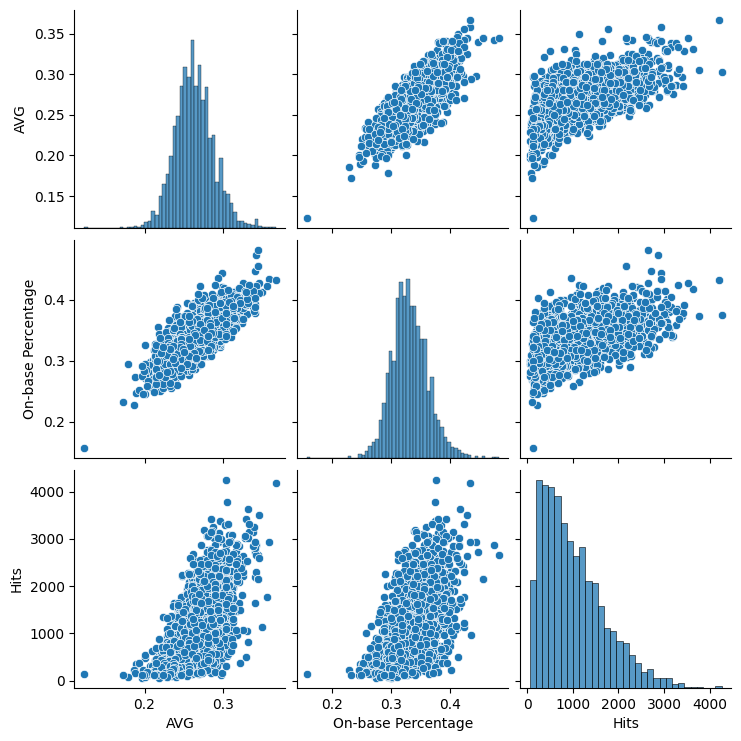

In [19]:
sns.pairplot(df[['AVG', 'On-base Percentage', 'Hits']])
plt.show()

- 우리가 관심 있는 것은 정규 타석의 정보를 대체할만한 변수인 개인 시즌 안타에 주목해야 한다.
- 안타의 개수가 0~25 사이에 있지만 타율과 출루율은 0.4를 넘기는 경우도 있고, 0에 근접한 데이터포인트도 존재하는 것을 확인
- 이상치 제거 필요
- 3행 1열을 보면, 당연히 안타가 높으면 타율이 높다.  
- 그러나 샘플이 부족한 경우에는 안타는 적은데 배팅avg는 굉장히 높을 수 있다. (많이 못나갔는데 방망이를 많이 휘둘러서 안타를 쳤거나 부상당함)

- 몇 번 휘둘러봤는데 성적이 안좋다든가. 부상을 당했다든가. 이런 케이스가 있을 수 있기 때문에
- 안타 수를 통해서 '규정 타석을 채웠다'라는 제약을 세워서 잘라볼 것이다. (출루율도 비슷한 경향을 보이기에 비슷하게 진행 예정)
- 본 실습에선 안타 50개 이상을 친 플레이어로 제한하여 상관 분석을 진행

## 1-4. 이상치 제거
- 타석에 대한 정보가 없지만, 간접적으로 안타 개수를 확인하여 가늠할 수 있다.
- 안타 개수 50개 이상부터 적용 필요

In [21]:
new_df = df.loc[df['Hits'] >=50, :].copy()
new_df # (258, 18)

,Player name,position,Games,At-bat,Runs,Hits,Double (2B),third baseman,home run,run batted in,a walk,Strikeouts,stolen base,Caught stealing,AVG,On-base Percentage,Slugging Percentage,On-base Plus Slugging
0,B Bonds,LF,2986.0,9847.0,2227.0,2935.0,601.0,77.0,762.0,1996.0,2558.0,1539,514.0,141,0.298,0.444,0.607,1.051
1,H Aaron,RF,3298.0,12364.0,2174.0,3771.0,624.0,98.0,755.0,2297.0,1402.0,1383,240.0,73,0.305,0.374,0.555,0.929
2,B Ruth,RF,2504.0,8399.0,2174.0,2873.0,506.0,136.0,714.0,2213.0,2062.0,1330,123.0,117,0.342,0.474,0.690,1.164
3,A Pujols,1B,3080.0,11421.0,1914.0,3384.0,686.0,16.0,703.0,2218.0,1373.0,1404,117.0,43,0.296,0.374,0.544,0.918
4,A Rodriguez,SS,2784.0,10566.0,2021.0,3115.0,548.0,31.0,696.0,2086.0,1338.0,2287,329.0,76,0.295,0.380,0.550,0.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503,R Derry,LF,187.0,553.0,68.0,124.0,17.0,7.0,17.0,73.0,78.0,124,2.0,0,0.224,0.322,0.373,0.695
2504,M Kittridge,C,470.0,4027.0,375.0,882.0,108.0,31.0,17.0,390.0,314.0,166,64.0,--,0.219,0.277,0.274,0.551
2505,G DeMontreville,2B,280.0,3615.0,537.0,1096.0,130.0,35.0,17.0,497.0,174.0,35,228.0,--,0.303,0.340,0.373,0.713
2506,L Niekro,1B,195.0,499.0,61.0,123.0,26.0,5.0,17.0,79.0,29.0,91,0.0,2,0.246,0.288,0.421,0.709


In [22]:
print('안타 개수에 대한 조건 생성 전 데이터셋의 행의 개수 : {}'.format(df.shape[0]))
print('안타 개수에 대한 조건 생성 후 데이터셋의 행의 개수 : {}'.format(new_df.shape[0]))

안타 개수에 대한 조건 생성 전 데이터셋의 행의 개수 : 2508
안타 개수에 대한 조건 생성 후 데이터셋의 행의 개수 : 2500


## 1-5. 정규성 재검정

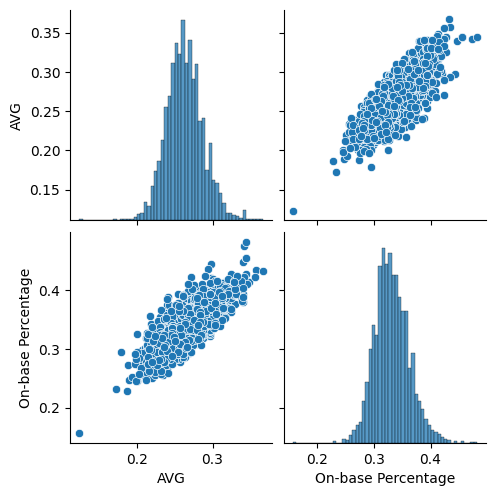

In [25]:
# pairplot으로 단변량, 다변량 확인
sns.pairplot(new_df[['AVG', 'On-base Percentage']])
plt.show()

In [26]:
# 이상치 제거 후 정규성을 충족하는지 확인

print('이상치 제거 후 타율의 정규성 shapiro test : ', stats.shapiro(new_df['AVG']))
print('이상치 제거 후 출루율의 정규성 shapiro test : ', stats.shapiro(new_df['On-base Percentage']))

이상치 제거 후 타율의 정규성 shapiro test :  ShapiroResult(statistic=0.9925202278248196, pvalue=4.771779855170255e-10)
이상치 제거 후 출루율의 정규성 shapiro test :  ShapiroResult(statistic=0.9885013834718374, pvalue=2.6079654492997176e-13)


- 이렇게 되면 귀무가설을 기각하지 못하게 될 텐데, -> 정규성은 충족하게 된다!

## 1-6. 피어슨 상관계수 산출
- Ho : 타율과 출루율은 선형적 관계가 없다.
- H1 : 타율과 출루율은 선형적 관계가 있다. 

In [27]:
# pearson correlation은 scipy의 pearsonr 함수 이용
stats.pearsonr(new_df['AVG'], new_df['On-base Percentage'])

PearsonRResult(statistic=0.7444208539645756, pvalue=0.0)

- 상관계수는 거의 0에 수렴함을 알 수 있다. 
- 따라서 귀무가설을 기각하고 선형적 관계가 있다고 결론 도출 가능

# 2. 비선형 순위 상관

## 2-1. 데이터 로딩


In [43]:
# 보스턴 집값 데이터 로딩
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# 데이터와 타겟 분리
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])  # 특성 데이터
target = raw_df.values[1::2, 2]  # 타겟 데이터 (주택 가격)

# 특성 이름 정의
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", 
    "PTRATIO", "B", "LSTAT"
]

# 데이터프레임 생성
boston = pd.DataFrame(data, columns=columns)
boston['MEDV'] = target  # 타겟 데이터를 데이터프레임에 추가

# 데이터프레임 확인
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## 2-2. 특정 지역 하위계층의 비율을 나타내는 `LSTAT`과 해당 지역 집값(중앙 값)을 나타내는 `MEDV` 관계 확인

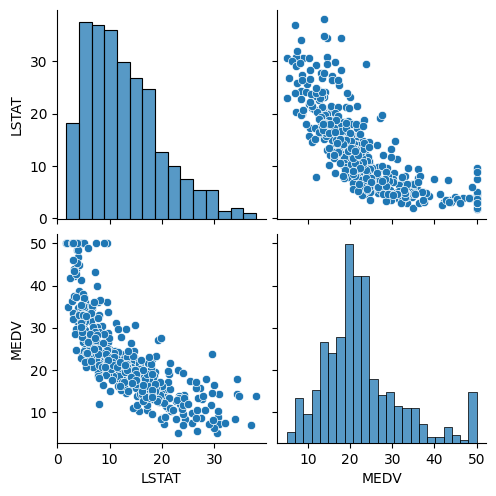

In [44]:
# pairplot을 통한 단변량, 다변량 관계 확인
sns.pairplot(boston[['LSTAT', 'MEDV']])
plt.show()

- 산점도 : 비선형 관계 포착(curvy한 느낌..)
- 히스토그램 : 정규분포와는 거리가 멀어보임(종모양이 아님..) --> i.e. 이상치 제거로도 선형성 확보는 힘들어보인다.

> 정규분포 모양으로 바꿔주기 위한 두 가지 방안 존재:

- log변환 후 피어슨 상관계수 활용 vs. log변환 후에도 정규분포 모양이 안되면 --> 그냥 (비모수) 비선형 스피어맨 순위 상관분석 실시

## 2-3. 로그 변환으로 선형화 후 산점도 확인

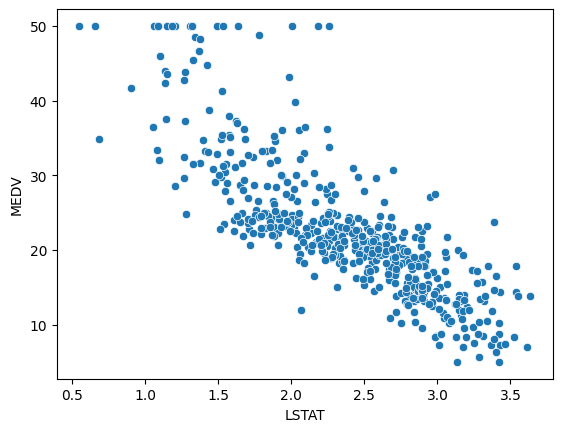

In [46]:
sns.scatterplot(x=np.log(boston_df['LSTAT']), y=boston_df['MEDV'])
plt.show()

- 이전의 비선형성에서 조금은 회복한 모습이다. 하지만 윗단의 - 이상치들 때문에 정규성 테스트에는 통과하지 못할 것이다.

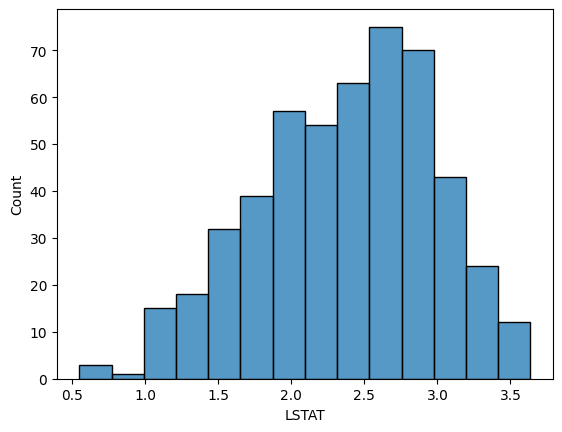

In [47]:
# 로그 변환 후 LSTAT 분포 확인
sns.histplot(np.log(boston['LSTAT']))
plt.show()

- 종모양과는 거리가 멀어보인다. 

In [48]:
stats.shapiro(np.log(boston['LSTAT'])) # 정규성 가정 충족 실패

ShapiroResult(statistic=0.9861662716407642, pvalue=9.802307309626944e-05)

## 2-4. 비선형 순위 상관 스피어맨

In [49]:
# scipy의 spearmenr 함수 이용
stats.spearmanr(boston['LSTAT'], boston['MEDV'])

SignificanceResult(statistic=-0.8529141394922163, pvalue=2.221727524313283e-144)

- pvalue를 보면 유의수준보다 훨씬 낮다. 거의 0에 수렴.. -> 귀무가설 기각!
- corration 계수를 보면 -0.85로 음의 상관계수가 있다. 

## 2-5. 상관분석 진행! (정규성 가정 만족은 X지만..)

In [50]:
stats.pearsonr(boston['LSTAT'], boston['MEDV'])

PearsonRResult(statistic=-0.7376627261740147, pvalue=5.081103394388513e-88)

- 피어슨 상관계수는 여기에서 만약 유의확률이 굉장히 낮게 나왔다고 하더라도 선형성이나 정규성이 만족이 되지 않았기 때문에 
- 통계적 유의성을 확보하기는 좀 어려웠고, 
- 그렇지만, 계수에 대한 의의가 시사하는 바가 컸기 때문에 (절댓값이 거의 1에 가까운 계수를 나타냈다 -> 비선형적인 특징을 잘 포착했다)

- 분포를 고려했을 떄, 스피어맨 상관계수가 순위를 고려하여 피어슨에 비해 더 적합한 상관성을 제시하고 있다. 